### 不同惩罚系数C取值下超平面可视化结果

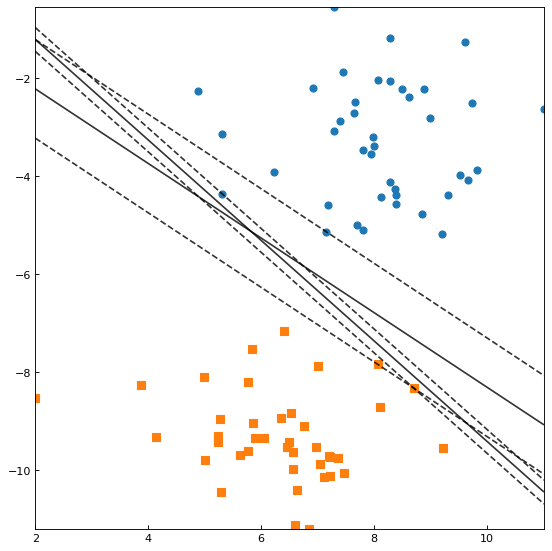

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


def decision_boundary():
    # 构造数据
    X, y = make_blobs(n_samples=80, centers=2, cluster_std=1.2, random_state=6)

    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    data = []
    for i in range(len(X)):
        index = np.where(y == i)[0]
        data.append(X[index, :])
    plt.figure(figsize=(7, 7), dpi=80)
    noise_x = np.array([[3.5, -3]])
    X = np.vstack([X, noise_x])
    noise_y = np.array([1])
    y = np.hstack([y, noise_y])

    # plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)

    clf = svm.SVC(kernel='linear', C=1000)
    clf.fit(X, y)
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X, y)
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    decision_boundary()
